The data contained in the CSV file "player_shooting_2023_2024" contains statistics on over 500 players in the English Premier League during the 2023-2024 season. The data includes their names, playing positions, team, birth year and month, expected goals, shooting accuracies, free kicks taken, and more. Here are each of the columns descriptions:

Rk: Index of the player in the list.
Player: Name of the player.
Nation: Nationality of the player.
Pos: Position of the player on the field.
Squad: Team the player belongs to.
Age: Age of the player at the time of Aug 1st 2023(season start).
Born: Birth year of the player.
90s: Number of 90-minute intervals the player participated in.
Gls: Total goals scored by the player.
Sh: Total shots taken by the player.
SoT: Shots on target by the player.
SoT%: Shot accuracy percentage.
Sh/90: Shots per 90 minutes.
SoT/90: Shots on target per 90 minutes.
G/Sh: Goals per shot.
G/SoT: Goals per shot on target.
Dist: Average distance of shots taken by the player.
FK: Free kicks taken by the player.
PK: Penalty kicks made by the player.
PKatt: Penalty kick attempts by the player.
xG: Expected goals.
npxG: Non-penalty expected goals.
npxG/Sh: Non-penalty expected goals per shot.
G-xG: Difference between actual goals and expected goals.
np:G-xG: Difference between non-penalty actual goals and non-penalty expected goals.
Matches: Link to matches played as a str.
Birth Month: Month of birth of the player.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('player_shooting_2023_2024.csv')
df.head()

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
0,0,1,Max Aarons,ENG,DF,Bournemouth,24.0,2000.0,12.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,Matches,May
1,1,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21.0,2002.0,4.3,0.0,...,0.0,0.0,0.0,0.3,0.3,0.27,-0.3,-0.3,Matches,April
2,2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches,July
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June


Step 4: I am getting rid of rows that are missing a lot of information: they have no stats and no player name is attached to them. I am adding a column that turns G-xG into 0 or 1 depending if the result is negative or positve. So 1 means the player scored more goals than expected, and 0 means they scored what was expected or less. I also get rid of columns like Gls (total goals scored) and Penalty Kicks made.

In [3]:
df.drop(df[df['Squad'] == 'Squad'].index)
df['Exceeded xG'] = np.where(df['G-xG'] > 0, 1, 0)
df = df.drop(columns=['Gls','PK', 'G-xG'])

df.head()

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Sh,...,Dist,FK,PKatt,xG,npxG,npxG/Sh,np:G-xG,Matches,Birth Month,Exceeded xG
0,0,1,Max Aarons,ENG,DF,Bournemouth,24.0,2000.0,12.1,1.0,...,23.9,0.0,0.0,0.0,0.0,0.02,0.0,Matches,May,0
1,1,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21.0,2002.0,4.3,1.0,...,15.3,0.0,0.0,0.3,0.3,0.27,-0.3,Matches,April,0
2,2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,1.2,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,Matches,July,0
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,14.0,...,14.2,0.0,0.0,0.7,0.7,0.05,1.3,Matches,February,1
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,28.0,...,9.5,0.0,0.0,5.6,5.6,0.20,3.4,Matches,June,1


Step 2: I use train_test_split to divide my data into training and testing sets, where 20% of the data is separated for testing.

In [4]:
X = df.drop(columns=['Player', 'Exceeded xG',])
y = df['Exceeded xG']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

Step 3: I continue to explore my dataset

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   584 non-null    int64  
 1   Rk           584 non-null    object 
 2   Player       584 non-null    object 
 3   Nation       584 non-null    object 
 4   Pos          584 non-null    object 
 5   Squad        584 non-null    object 
 6   Age          562 non-null    float64
 7   Born         562 non-null    float64
 8   90s          562 non-null    float64
 9   Sh           562 non-null    float64
 10  SoT          562 non-null    float64
 11  SoT%         457 non-null    float64
 12  Sh/90        562 non-null    float64
 13  SoT/90       562 non-null    float64
 14  G/Sh         457 non-null    float64
 15  G/SoT        395 non-null    float64
 16  Dist         457 non-null    float64
 17  FK           562 non-null    float64
 18  PKatt        562 non-null    float64
 19  xG      

,Unnamed: 0,Age,Born,90s,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PKatt,xG,npxG,npxG/Sh,np:G-xG,Exceeded xG
count,584.000000,562.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,562.000000,457.000000,395.000000,457.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,584.000000
mean,291.500000,25.770463,1997.519573,12.224555,15.044484,5.088968,31.132166,1.399875,0.432242,0.089606,0.294810,16.587309,0.412811,0.158363,1.748577,1.622954,0.101510,-0.030427,0.268836
std,168.730554,4.360614,4.364883,9.444622,18.596374,7.175611,20.309767,2.056370,0.617645,0.113247,0.274362,4.858932,1.465119,0.715135,2.766119,2.448454,0.073324,1.068367,0.443734
min,0.000000,17.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.010000,-6.100000,0.000000
25%,145.750000,22.000000,1994.000000,3.500000,2.000000,0.000000,20.000000,0.322500,0.000000,0.000000,0.000000,12.700000,0.000000,0.000000,0.100000,0.100000,0.050000,-0.400000,0.000000
50%,291.500000,26.000000,1998.000000,11.300000,8.000000,2.000000,30.800000,0.925000,0.230000,0.070000,0.280000,16.400000,0.000000,0.000000,0.700000,0.700000,0.090000,-0.100000,0.000000
75%,437.250000,29.000000,2001.000000,19.800000,22.000000,7.000000,41.200000,2.007500,0.667500,0.140000,0.430000,19.900000,0.000000,0.000000,2.100000,2.100000,0.130000,0.200000,1.000000
max,583.000000,39.000000,2007.000000,32.000000,99.000000,42.000000,100.000000,30.000000,7.500000,1.000000,1.000000,32.900000,13.000000,8.000000,21.800000,18.700000,0.960000,5.500000,1.000000


Step 5: I use DataFrame.hist and plotting.scatter_matrix() to visualize my data

array([[<Axes: xlabel='90s', ylabel='90s'>,
        <Axes: xlabel='Sh', ylabel='90s'>,
        <Axes: xlabel='Sh/90', ylabel='90s'>,
        <Axes: xlabel='Dist', ylabel='90s'>,
        <Axes: xlabel='PKatt', ylabel='90s'>],
       [<Axes: xlabel='90s', ylabel='Sh'>,
        <Axes: xlabel='Sh', ylabel='Sh'>,
        <Axes: xlabel='Sh/90', ylabel='Sh'>,
        <Axes: xlabel='Dist', ylabel='Sh'>,
        <Axes: xlabel='PKatt', ylabel='Sh'>],
       [<Axes: xlabel='90s', ylabel='Sh/90'>,
        <Axes: xlabel='Sh', ylabel='Sh/90'>,
        <Axes: xlabel='Sh/90', ylabel='Sh/90'>,
        <Axes: xlabel='Dist', ylabel='Sh/90'>,
        <Axes: xlabel='PKatt', ylabel='Sh/90'>],
       [<Axes: xlabel='90s', ylabel='Dist'>,
        <Axes: xlabel='Sh', ylabel='Dist'>,
        <Axes: xlabel='Sh/90', ylabel='Dist'>,
        <Axes: xlabel='Dist', ylabel='Dist'>,
        <Axes: xlabel='PKatt', ylabel='Dist'>],
       [<Axes: xlabel='90s', ylabel='PKatt'>,
        <Axes: xlabel='Sh', ylabel='PKatt'>,

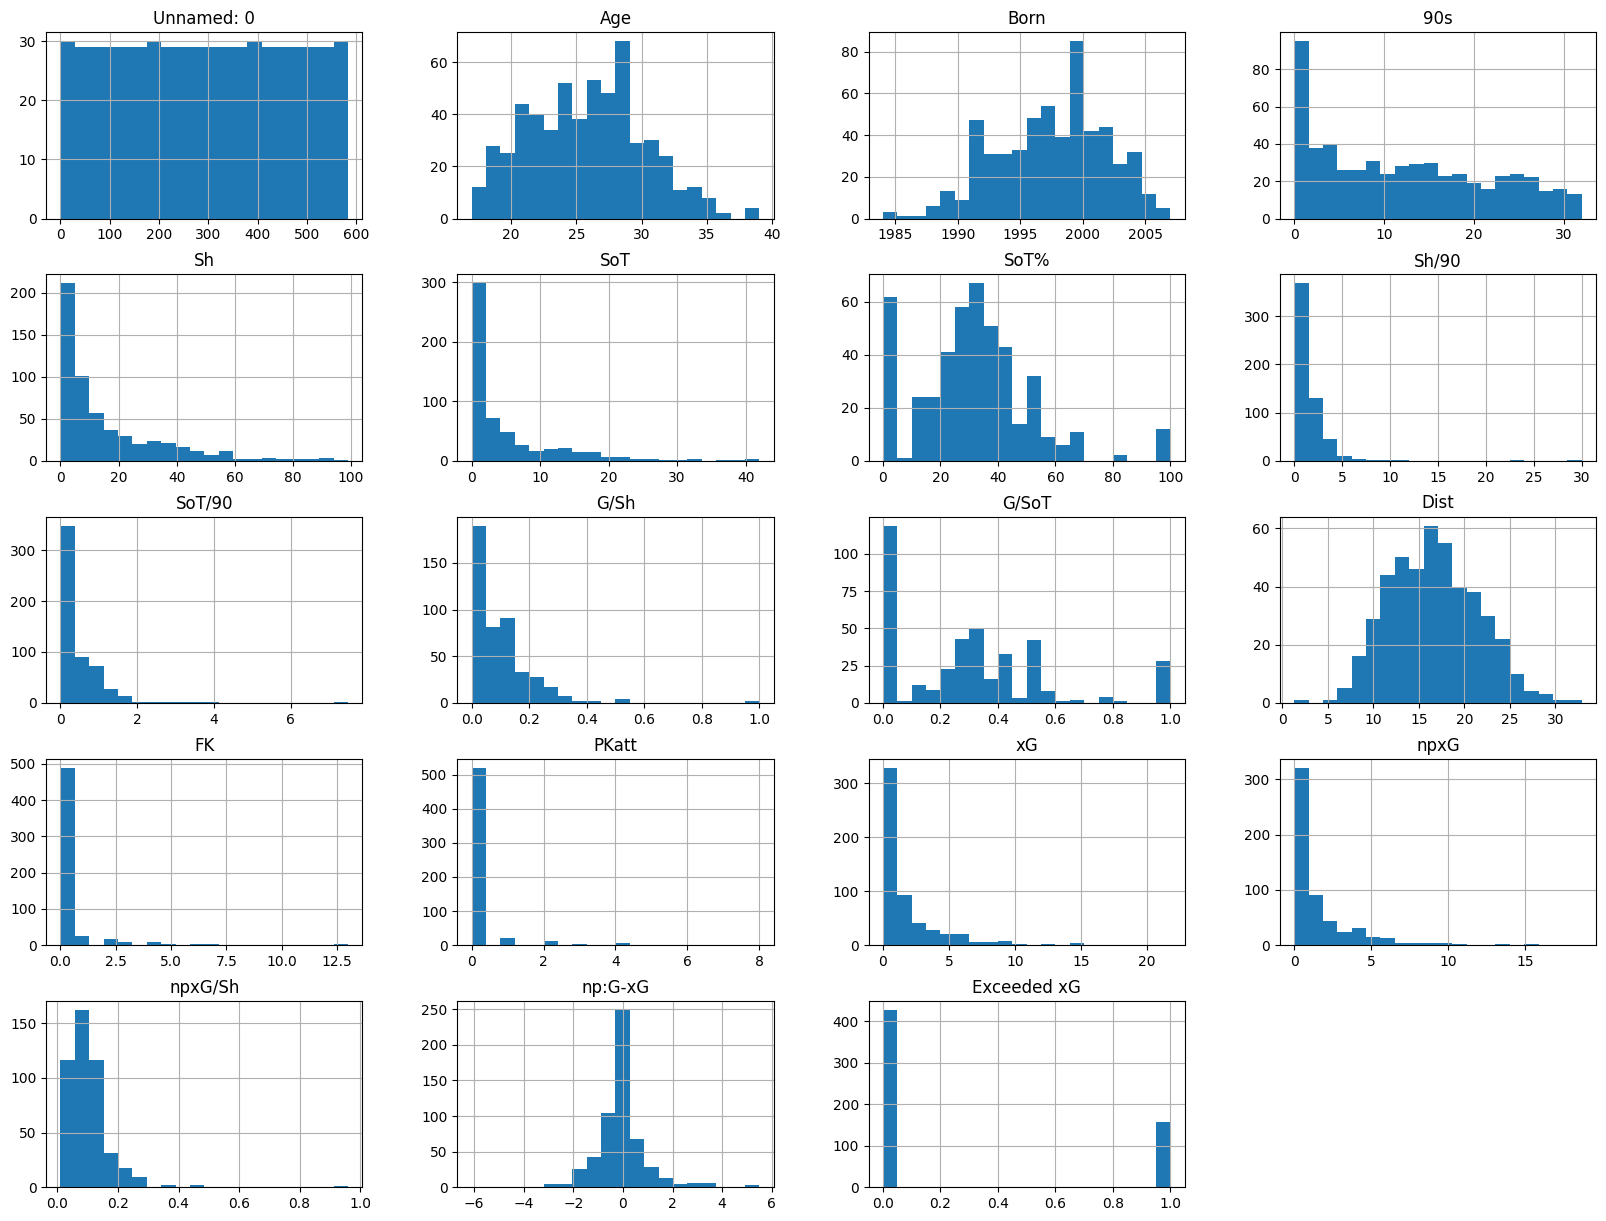

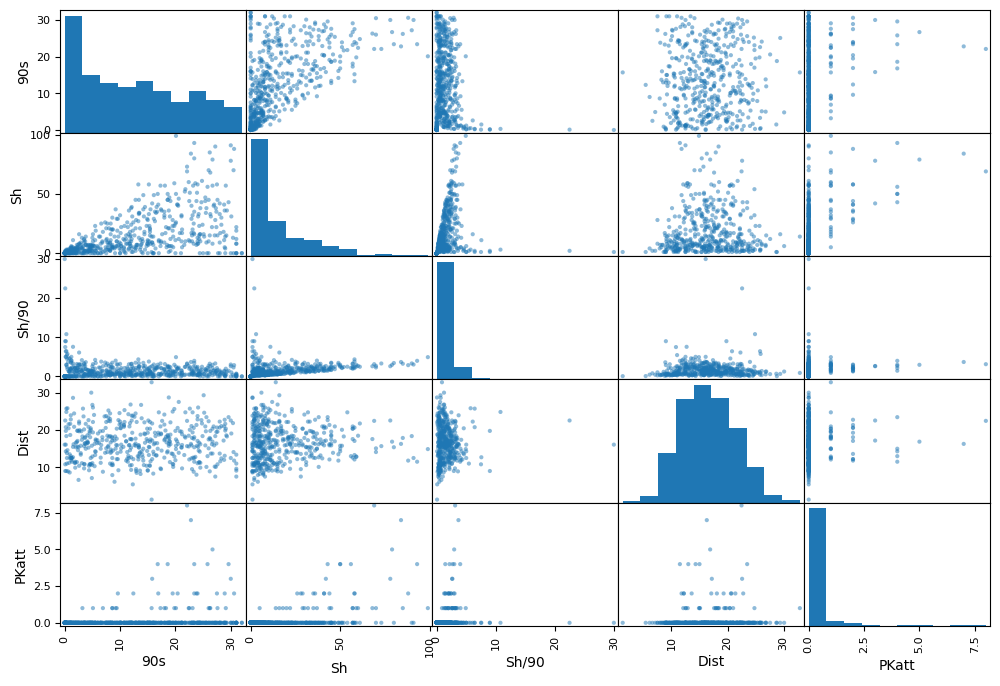

In [11]:
df.hist(bins = 20 , figsize = (20,15))
attributes = ['90s','Sh','Sh/90','Dist','PKatt']
scatter_matrix(df[attributes], figsize=(12,8))

Step 6: I use all four transformations on columns SoT% and Sh/90. These are shot accuracy percentage and shots per 90 minutes.

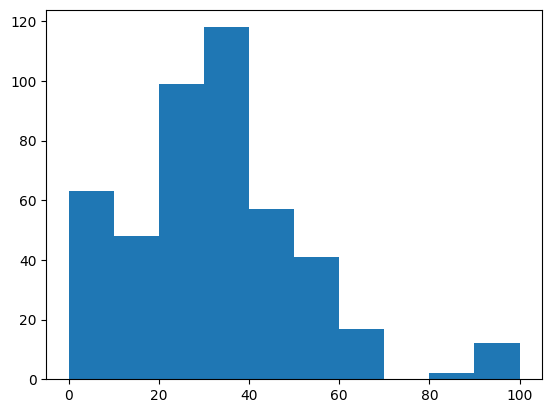

In [14]:
#for SoT%
plt.hist(df['SoT%'].values.reshape(-1, 1))
plt.show()

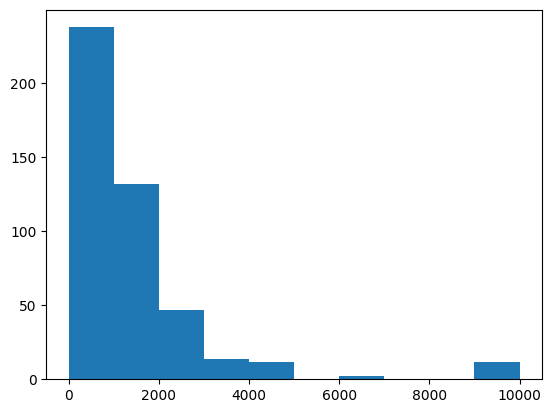

In [15]:
plt.hist(df['SoT%'].values.reshape(-1, 1)**2, bins=10)
plt.show()

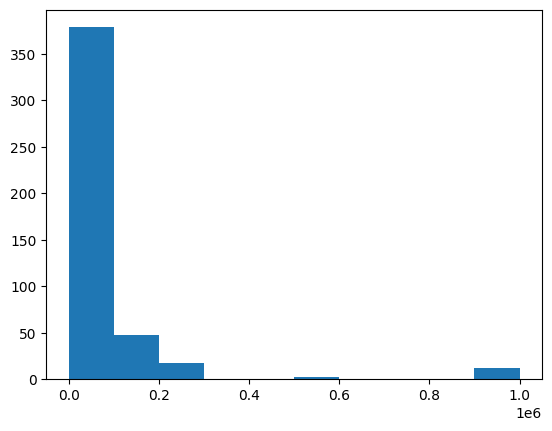

In [16]:
plt.hist(df['SoT%'].values.reshape(-1, 1)**3, bins=10)
plt.show()

/var/folders/9p/lk3m4mk5611202nqnkqy7_1m0000gn/T/ipykernel_86042/2126365003.py:2: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(df['SoT%'].values.reshape(-1, 1)), bins=10)


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

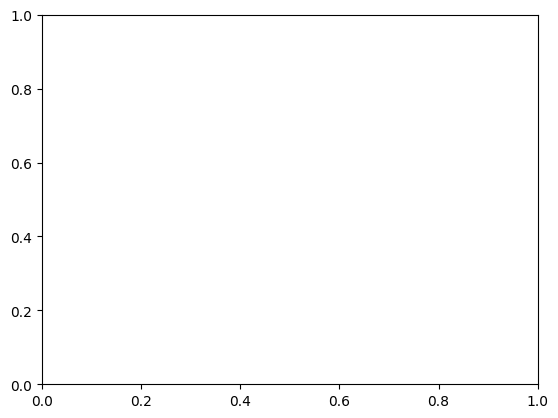

In [29]:
#Also not sure why this isn't working, I suspect its the zeros so I will add an alpha but I'm confused why it's throwing an error
plt.hist(np.log(df['SoT%'].values.reshape(-1, 1)), bins=10)
plt.show()

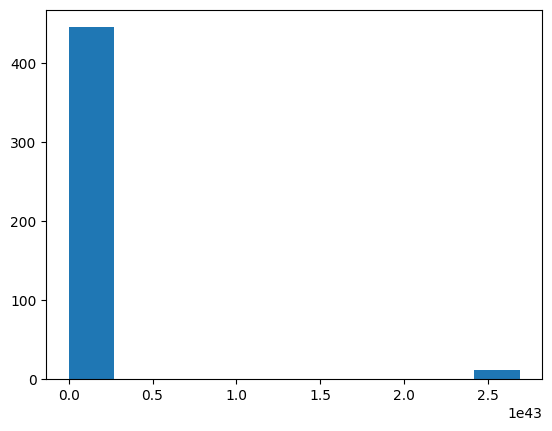

In [18]:
plt.hist(np.exp(df['SoT%'].values.reshape(-1, 1)), bins=10)
plt.show()

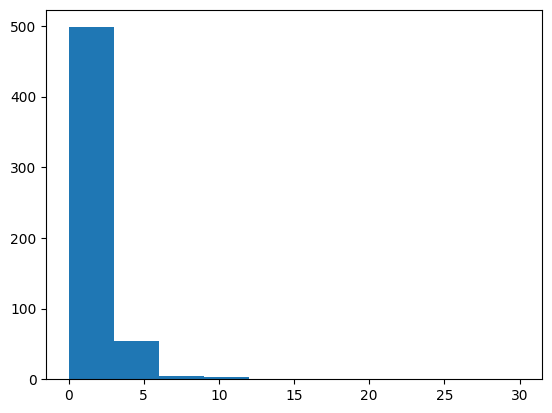

In [19]:
#for Sh/90
plt.hist(df['Sh/90'].values.reshape(-1, 1))
plt.show()

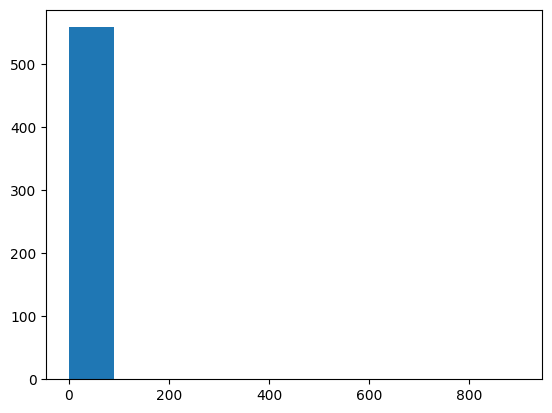

In [20]:
plt.hist(df['Sh/90'].values.reshape(-1, 1)**2, bins=10)
plt.show()

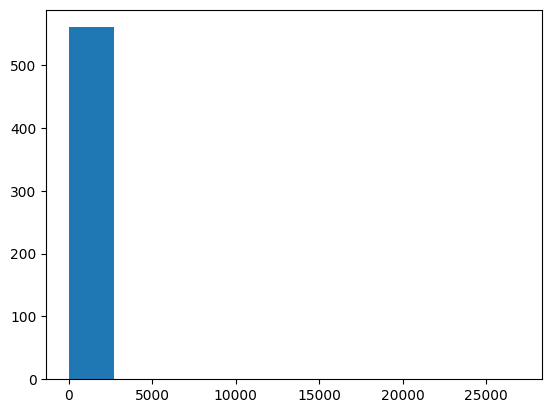

In [21]:
plt.hist(df['Sh/90'].values.reshape(-1, 1)**3, bins=10)
plt.show()

/var/folders/9p/lk3m4mk5611202nqnkqy7_1m0000gn/T/ipykernel_86042/1696304333.py:1: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(df['Sh/90'].values.reshape(-1, 1)), bins=5)


ValueError: supplied range of [-inf, 3.4011973816621555] is not finite

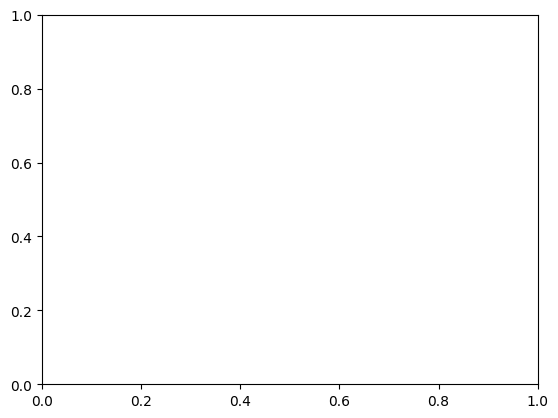

In [24]:
#I'm not sure why this threw an error, all the values are positive.
plt.hist(np.log(df['Sh/90'].values.reshape(-1, 1)), bins=5)
plt.show()

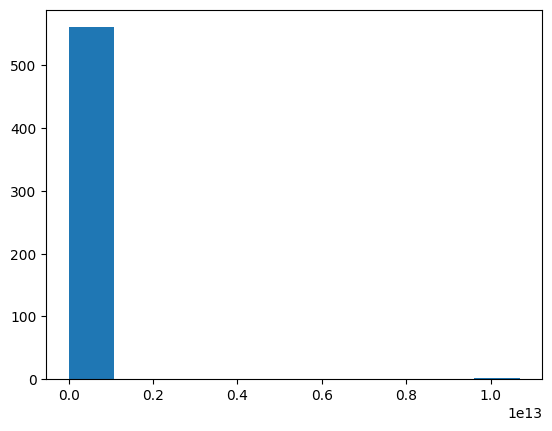

In [23]:
plt.hist(np.exp(df['Sh/90'].values.reshape(-1, 1)), bins=10)
plt.show()